<a href="https://colab.research.google.com/github/Sharon972/MactiMEIA/blob/main/DL_10_CAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Dense

In [2]:
# Load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#28x28x1 1 channel
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test  = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# Print info
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [3]:
print(x_train.min())
print(x_train.max())

0.0
1.0


In [4]:
# Define CAE model 8(Convolutional autoencoder)
in_layer = Input(shape=(28, 28, 1), name='IN')

h = Conv2D(256, (3, 3), activation='relu', padding='same')(in_layer) #(3, 3) 256 filter 3x3, padding (input = ouput)
h = MaxPooling2D()(h)#28x28 --> 14x14
h = Conv2D(128, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D()(h)#14x14 --> 7x7
h = Conv2D(64, (3, 3), activation='relu', padding='same')(h)
h = MaxPooling2D()(h)#7x7 --> 3x3 (don't exist 3.5x3.5 pixels)
h = Conv2D(32, (3, 3), activation='relu', padding='same')(h)

latent = MaxPooling2D(name='LATENT')(h) #3x3 --> 1x1 (don't exist 1.5x1.5) --- shape (1x1x32)

h = Conv2D(32, (3, 3), activation='relu', padding='same')(latent) #1x1 --> 4x4
h = UpSampling2D((4, 4))(h)
h = Conv2D(64, (3, 3), activation='relu', padding='same')(h)
h = UpSampling2D()(h)
h = Conv2D(128, (3, 3), activation='relu', padding='same')(h)
h = UpSampling2D()(h)
h = Conv2D(256, (3, 3), activation='relu')(h)
h = UpSampling2D()(h)

out_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='OUT')(h)
#sigmoid because I want 0 and 1

CAE = Model(in_layer, out_layer)
CAE.summary()

CAE.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#binary cross entropy because in this case there aren't intermediate values.

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ IN (InputLayer)                      │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LATENT (MaxPooling2D)                │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 1, 1, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OUT (Conv2D)                         │ (None, 28, 28, 1)           │           2,305 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 788,929 (3.01 MB)

 Trainable params: 788,929 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Another way to do it with Conv2DTranspose

#In this case don't exist max pooling
in_l2 = Input(shape=(28, 28, 1), name='IN')

hh = Conv2D(256, (3, 3), strides=2, padding='same', activation='relu')(in_l2)#loss a column at every step
hh = Conv2D(128, (3, 3), strides=2, padding='same', activation='relu')(hh)
hh = Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(hh)
hh = Conv2D(32, (3, 3), strides=2, padding='same', activation='relu')(hh)

L = MaxPooling2D(name='LATENT')(hh)

hh = Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu')(L)
hh = Conv2DTranspose(32, (3, 3), strides=2, padding='same', activation='relu')(hh)
hh = Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu')(hh)
hh = Conv2DTranspose(64, (3, 3), strides=2, padding='same', activation='relu')(hh)
hh = Conv2DTranspose(128, (3, 3), strides=2, activation='relu')(hh)
hh = Conv2D(256, (6, 6), activation='relu')(hh)

out_l2 = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='OUT')(hh)

CAE2 = Model(in_l2, out_l2)
CAE2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ IN (InputLayer)                      │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 4, 4, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 2, 2, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LATENT (MaxPooling2D)                │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 2, 2, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OUT (Conv2D)                         │ (None, 28, 28, 1)           │           2,305 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,719,841 (6.56 MB)

 Trainable params: 1,719,841 (6.56 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train model
history = CAE.fit(x=x_train, y=x_train, epochs=100, batch_size=128, validation_split=0.2)#x y y must be iqual

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.8024 - loss: 0.2857 - val_accuracy: 0.8018 - val_loss: 0.1607
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 33ms/step - accuracy: 0.8034 - loss: 0.1509 - val_accuracy: 0.8088 - val_loss: 0.1303
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8075 - loss: 0.1291 - val_accuracy: 0.8102 - val_loss: 0.1190
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8094 - loss: 0.1171 - val_accuracy: 0.8096 - val_loss: 0.1144
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8102 - loss: 0.1122 - val_accuracy: 0.8114 - val_loss: 0.1097
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.8107 - loss: 0.1079 - val_accuracy: 0.8119 - val_loss: 0.1058
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8111 - loss: 0.1048 - val_accuracy: 0.8114 - val_loss: 0.1053
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8119 - loss: 0

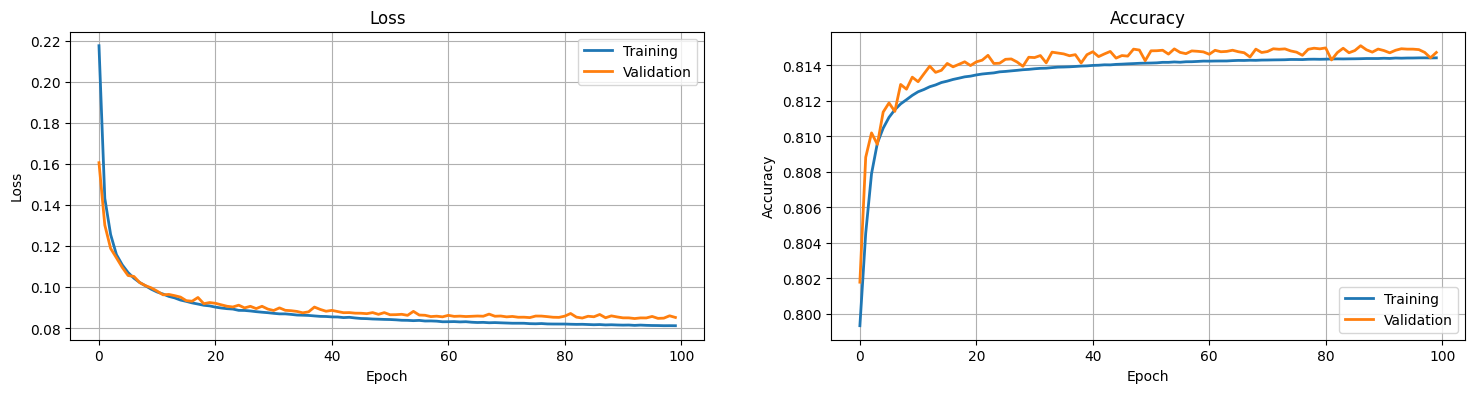

In [7]:
# Plot loss
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(CAE.history.history['loss'], label='Training', linewidth=2)
plt.plot(CAE.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(CAE.history.history['accuracy'], label='Training', linewidth=2)
plt.plot(CAE.history.history['val_accuracy'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

In [8]:
# Predict reconstruction error on test data
test_loss = CAE.evaluate(x_test, x_test)
print(f"Test loss {test_loss[0]:.4f} -- Test accuracy {test_loss[1]:.4f}")

x_test_hat = CAE.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8204 - loss: 0.0835
Test loss 0.0842 -- Test accuracy 0.8131
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


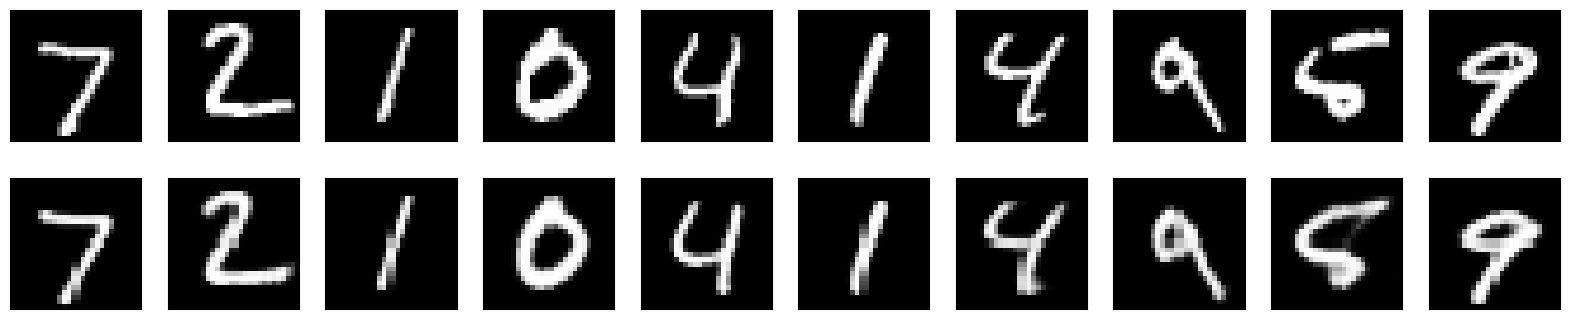

In [9]:
# Show a few reconstruction examples
plt.figure(figsize=(20, 4))
for i in range(10):
  ax = plt.subplot(2, 10, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, 10, 10 + i + 1)
  plt.imshow(x_test_hat[i].reshape(28, 28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
# Create a submodel using only the encoder part of previous model (output must be latent layer)
encoder = Model(inputs=in_layer, outputs=latent)
encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ IN (InputLayer)                      │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 256)         │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LATENT (MaxPooling2D)                │ (None, 1, 1, 32)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 389,856 (1.49 MB)

 Trainable params: 389,856 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compute latent space
test_latent = encoder.predict(x_test).reshape((len(x_test), -1))
print(test_latent.shape) #los 10000 datos me los devuelve en 32 variables(vectores) que es el formato de la representación latente

(10000, 32)


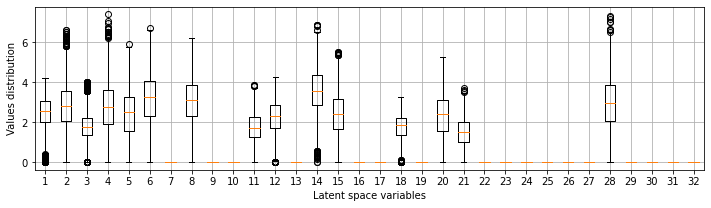

In [ ]:
# Plot distribution of latent space (distribución de las 32 variables del espcaio latente)
plt.figure(figsize=(12, 3))
plt.boxplot(test_latent)
plt.xlabel('Latent space variables')
plt.ylabel('Values distribution')
plt.grid()
plt.show()

In [ ]:
# Create a submodel using only the decoder part of the model
latent_input = Input(shape=(1, 1, 32))

deco = CAE.layers[-9](latent_input) #la primera capa es la de la posición -9 que procfesará la entrada (latent_input)
deco = CAE.layers[-8](deco)
deco = CAE.layers[-7](deco)
deco = CAE.layers[-6](deco)
deco = CAE.layers[-5](deco)
deco = CAE.layers[-4](deco)
deco = CAE.layers[-3](deco)
deco = CAE.layers[-2](deco)
deco = CAE.layers[-1](deco)

# create the decoder model
decoder_model = Model(inputs=latent_input, outputs=deco)
decoder_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1, 32)]        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 128)       0   

In [ ]:
# Reconstruct from latent
test_hat = decoder_model.predict(test_latent.reshape((-1, 1, 1, 32)))
print(test_hat.shape)

(10000, 28, 28, 1)


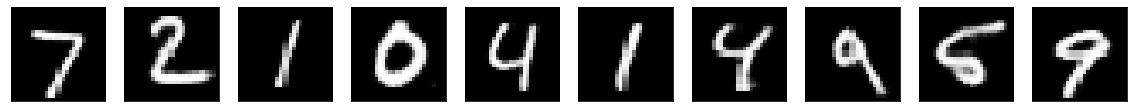

In [ ]:
# Show a few reconstruction examples
plt.figure(figsize=(20, 3))
for i in range(10):
  ax = plt.subplot(1, 10, i + 1)
  plt.imshow(test_hat[i].reshape(28, 28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Encode training data
train_latent = encoder.predict(x_train).reshape((len(x_train), -1))

mean_train = train_latent.mean(axis=0)
std_train  = train_latent.std(axis=0)

In [ ]:
# AUX function to sample from latent distribution
def sample_z():
  z = np.zeros((mean_train.shape))
  for ind in range(mean_train.shape[0]):
    z[ind] = np.random.normal(loc=mean_train[ind], scale=std_train[ind])
  return z

In [ ]:
# Generate 10 random samples from latent distribution
z_samples_hat = np.zeros((10, 28, 28, 1))
for ind_samp in range(10):
  z_samples_hat[ind_samp] = decoder_model.predict(sample_z().reshape((-1, 1, 1, 32)))

print(z_samples_hat.shape)

(10, 28, 28, 1)


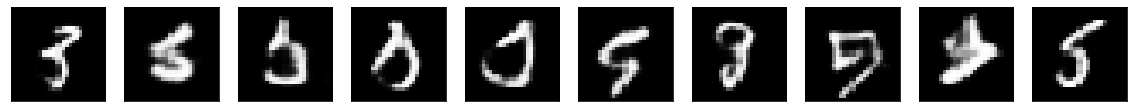

In [ ]:
# Show a few reconstruction from random samples
plt.figure(figsize=(20, 3))
for i in range(10):
  ax = plt.subplot(1, 10, i + 1)
  plt.imshow(z_samples_hat[i].reshape(28, 28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()